# Aufgabe 1 Numerische Stabilität

(a)𝑓(𝑥)=(𝑥3+1/3)−(𝑥3−1/3) und
(b)𝑔(𝑥)=((3+𝑥3/3)−(3−𝑥3/3))/𝑥3
Bestimmen Sie empirisch, für welche Bereiche von 𝑥(grob) das numerische Ergebnis 
• vom algebraischen um nicht mehr als 1% abweicht, 
• gleich Null ist. 




a) algebraisches Ergebnis: $f(x)= \frac{2}{3} \forall x$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return (x**3+1/3)-(x**3-1/3)


Abweichung =(2/3-f(100000))/(2/3) #für verschiedene Werte für x und damit f(x) muss die Abweichung unter 0.01 sein
#ich habe einfach mal verschiedene x-Werte eingesetzt und geschaut, wann die Abweichung mehr als 1% beträgt. 
#Es gibt bestimmt ein Befehl, der einem den genauen x-Wert herausgibt, bei dem die Abweichung mehr als 1% beträgt, aber 
#den habe ich nicht gefunden :(


print(Abweichung)

-0.12500000000000006


Für $x > 10^5$ beträgt die Abweichung mehr als 1% und für $x\to \infty$  wird das numerische Ergebnis 0

b) algebraisches Ergebnis: $f(x)= \frac{2}{3} \forall x$

In [3]:
def g(x):
    return ((3+x**3/3)-(3-x**3/3))/x**3

Abweichung =(2/3-g(0.00001))/(2/3)

print(Abweichung)

-0.33226762955018757


Für $x < 10^{-5}$ beträgt die Abweichung mehr als 1%
und für $x\to 0$  wird das numerische Ergebnis 0

c) Stellen Sie das Ergebnis in geeigneter Form graphisch dar (d.h. z.B. logarithmische𝑥-Skala)

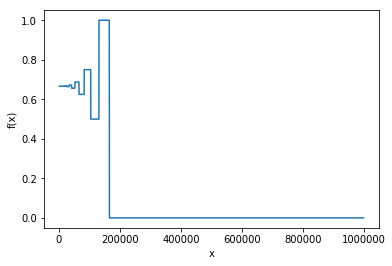

In [4]:
x = np.geomspace(1000, 1000000, 10000)  #logarithmische Darstellung durch logspace hat nicht funktioniert, weil dann ein Runtime-Error auftritt.
plt.plot(x, f(x))
plt.ylabel(r'f(x)') 
plt.xlabel(r"x")
plt.show()

Für $x\to\infty$ wird f(x) null. Allerdings gibt es auch schon bei kleineren x-Werten große Abweichungen zum algebraischen Wert. 
(Warum?)

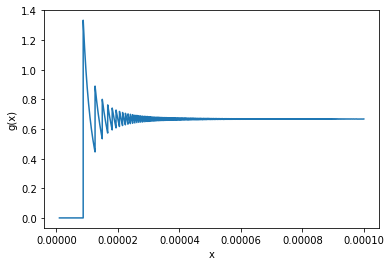

In [5]:
x = np.geomspace(10**-6, 10**-4, 10000) 
plt.plot(x, g(x))
plt.ylabel(r'g(x)') 
plt.xlabel(r"x")
plt.show()

Hier ist anschaulich dargestellt, dass g(x) für $x\to 0$ null wird. Wie bei f(x) sind hier auch bei größer werdenden x-Werten Abweichungen zu sehen.

 d) Wie ändert sich die Darstellung, wenn Sie die Datenpunkt mit dem Datentyp float32 bzw. float64 erstellen?

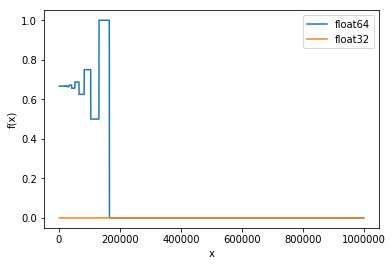

In [6]:
x_32 = np.geomspace(1000, 1000000, 10000, dtype='float32')
x_64 = np.geomspace(1000, 1000000, 10000, dtype='float64')

plt.plot(x_64, f(x_64), label = 'float64')
plt.plot(x_32, f(x_32), label = 'float32')

plt.ylabel(r'f(x)') 
plt.xlabel(r"x")
plt.legend(loc="best")
plt.show()

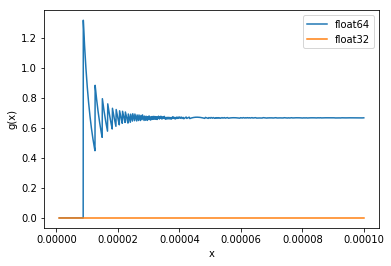

In [7]:
x_32 = np.geomspace(10**-6, 10**-4, 1000, dtype='float32')
x_64 = np.geomspace(10**-6, 10**-4, 1000, dtype='float64')

plt.plot(x_64, g(x_64), label = 'float64')
plt.plot(x_32, g(x_32), label = 'float32')

plt.ylabel(r'g(x)') 
plt.xlabel(r"x")
plt.legend(loc="best")
plt.show()

Zu d) es ist zu sehen, dass die Abweichung von f(x) bzw. g(x) zum algebraischen Wert beim Datentyp float32 größer ist.

# Aufgabe 2 Numerische Stabilität und Kondition

Der Ausdruck f(E, Θ) stellt einen Summanden des differentiellen Wirkungsquerschnitts für die Reak-
tion e − e + → γγ dar und ist gegeben durch
f(E, Θ) =
2 + sin 2 Θ
.
1 − β 2 cos 2 Θ
mit
β = √1 − γ −2 ,
γ=
E e
m e
(m e = 511 keV).

(a) Ist diese Gleichung für f(E, Θ) numerisch stabil? In welchem Bereich von Θ ist die Gleichung
für E e = 50 GeV numerisch instabil?

Was sorgt für Instabilität?
1. Subtraktion gleich großer Zahlen
2. Division durch kleine Zahlen
3. Multiplikation mit großen Zahlen

2 + sin²Θ: hier kann keine Unstabilität auftreten.

β²: Um β zu berechnen muss zunächst γ berechnet werden.
    Hier kann Punkt 2 verletzt werden, wenn E >> m ist.
    Dann ist γ groß und somit besteht bei der Berechnung von β kein Problem.
    Ist γ jedoch ungefähr 1 (also E ungefähr m), werden bei der Berechnung von β gleich große Zahlen subrahiert, was Regel 1 verletzt.
    
β²cos²Θ: β und cosΘ sind beide durch 1 beschränkt und somit kann Regel 3 nicht verletzt werden.
1-β²cos²Θ: Regel 1 wird verletzt, wenn sowohl β als auch der Betrag von cosΘ ca. 1 sind. Dies ist der Fall, wenn E >> m ist oder wenn Θ 0 oder $\pi$ ist.
In diesem Fall würde auch der Zähler klein werden, was Regel 1 verletzen würde.

Ist E = 50GeV wird β ca. 1. Somit ist die Gleichung instabil, wenn der zuletzt beschriebene Fall eintritt und Θ im Bereich von 0 oder $\pi$ ist.

(b) Beheben Sie die Stabilitätsprobleme durch eine geeignete analytische Umformung. (Hinweis:
Nutzen Sie 1 − β 2 = 1 / γ 2 und 1 = sin 2 Θ + cos 2 Θ)

$\frac{2+sin²\theta}{1-\beta²cos²\theta} = \frac{2+sin²\theta}{sin²\theta+ cos²\theta-\beta²cos²\theta} = \frac{2+sin²\theta}{sin²\theta+1/\gamma²cos²\theta}$

(c) Zeigen Sie, dass Sie die Stabilitätsprobleme behoben haben, indem Sie beide Gleichungen im
kritischen Intervall darstellen.

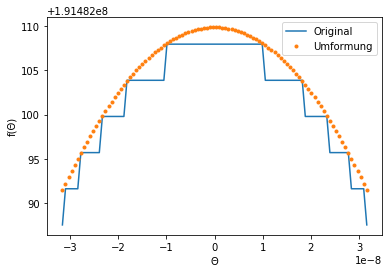

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#da nur der betrag von sin bzw cos entscheident ist wird nur der bereich um 0 dargestellt
Θ = np.linspace(-10**-7.5,10**-7.5,100)
γ = 5e9/511e3 
β = np.sqrt(1-γ**(-2))


plt.plot(Θ, (2+np.sin(Θ)**2)/(1- β**2*np.cos(Θ)**2), label="Original")
plt.plot(Θ, (2+np.sin(Θ)**2)/(1/(γ**2)*np.cos(Θ)**2+np.sin(Θ)**2),".", label="Umformung",)
plt.ylabel("f(Θ)")
plt.xlabel("Θ")
plt.legend()

None

Da durch die Umformung im Nenner keine Differenz gleich großer Zahlen ist, sondern eine Summe von jeweils sehr kleinen Zahlen, ist der Graph "glatter", da nicht auf Grund der Rundung Nachkommastellen in verschiedenen Größenordungen abgeschnitten werden. Dadurch kommt es bei der nicht umgeformten Formel zu Ungenauigkeiten.

(d) Berechnen Sie die Konditionszahl. Wie hängt diese von Θ ab?

Aus der Vorlesung: $K = | x \frac{f'(x)}{f(x)} |$

$f'(\theta) = \frac{2 cos(\theta) sin(\theta)}{1- \beta² cos²(\theta)} - \frac{2 \beta² cos(\theta) sin³(\theta)}{(1- \beta² cos²(\theta))²}$

$K = | \frac{\theta}{2 + sin²\theta} \cdot ( 2 cos\theta sin\theta - \frac{2 \beta² cos(\theta) sin³(\theta)}{1- \beta² cos²(\theta)} |$

(e) Stellen Sie den Verlauf der Konditionszahl als Funktion von Θ (0 ≤ Θ ≤ π) grafisch dar. In
welchem Bereich ist das Problem gut bzw. schlecht konditioniert?

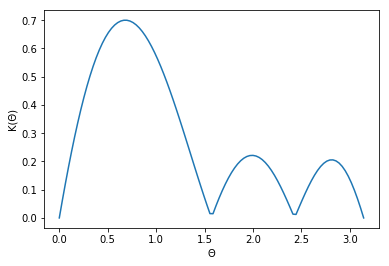

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Θ = np.linspace(0, np.pi ,100)
γ = 5e9/511e3 
β = np.sqrt(1-γ**(-2))

plt.plot(Θ, np.abs(Θ/( 2 + np.sin(Θ)**2 )* ( 2* np.cos(Θ) * np.sin(Θ)) - (2 * β**2 * np.cos(Θ) * np.sin(Θ)**3)/(1- β**2 * np.cos(Θ)**2)) )
plt.ylabel("K(Θ)")
plt.xlabel("Θ")

None

Da die Konditionszahl überall kleiner 1 ist, wird die Fehlerfortpflanzung im gesamten Intervall gedämpft. Damit ist das Problem gut konditioniert.

(f) Was ist der Unterschied zwischen Stabilität und Kondition?

Die Stabilität beschreibt, wie gut eine Lösung bei nicht exakter Rechnung ist. Durch umformen der Funktion kann die Stabilität verbessert werden.

Die Kondition beschreibt, wie sich Fehler der Anfangswerte fortpflanzen. Sie kann für ein bestehendes Problem (Funktion) nicht verbessert werden.